In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [5]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

In [6]:
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

In [7]:
for idx, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

In [8]:
m.save('restaurant_map.html')

In [9]:
city_group = data.groupby('City').size().reset_index(name='Restaurant Count')
print(city_group.sort_values(by='Restaurant Count', ascending=False))

            City  Restaurant Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
..           ...               ...
37   Dicky Beach                 1
68          Lorn                 1
107  Quezon City                 1
66       Lincoln                 1
65      Lakeview                 1

[141 rows x 2 columns]


In [10]:
city_stats = data.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).reset_index()
print(city_stats)

                City  Aggregate rating  Price range
0          Abu Dhabi          4.300000     3.300000
1               Agra          3.965000     2.650000
2          Ahmedabad          4.161905     2.571429
3             Albany          3.555000     1.700000
4          Allahabad          3.395000     2.650000
..               ...               ...          ...
136          Weirton          3.900000     2.000000
137  Wellington City          4.250000     3.250000
138   Winchester Bay          3.200000     2.000000
139          Yorkton          3.300000     2.000000
140        ��stanbul          4.292857     2.857143

[141 rows x 3 columns]


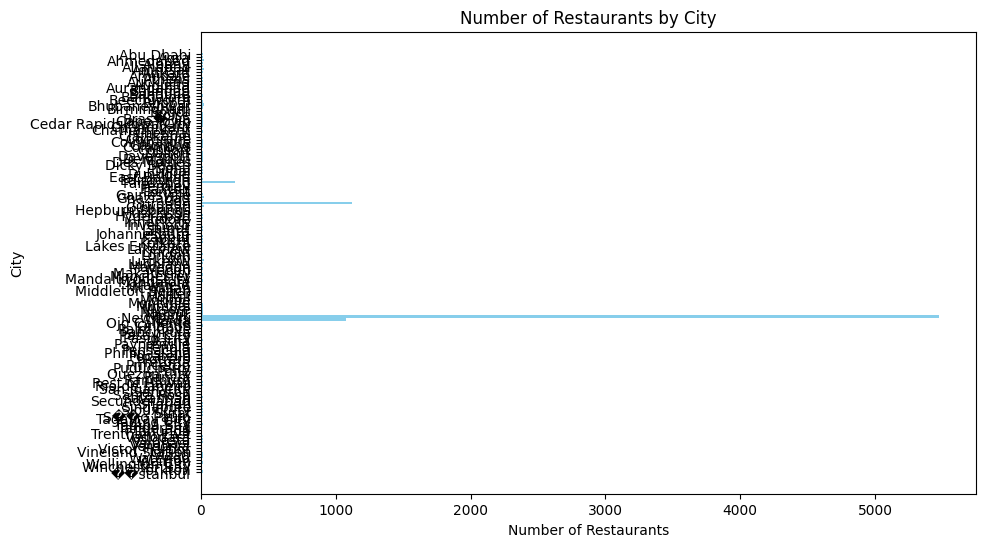

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(city_group['City'], city_group['Restaurant Count'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Number of Restaurants by City')
plt.gca().invert_yaxis()
plt.show()

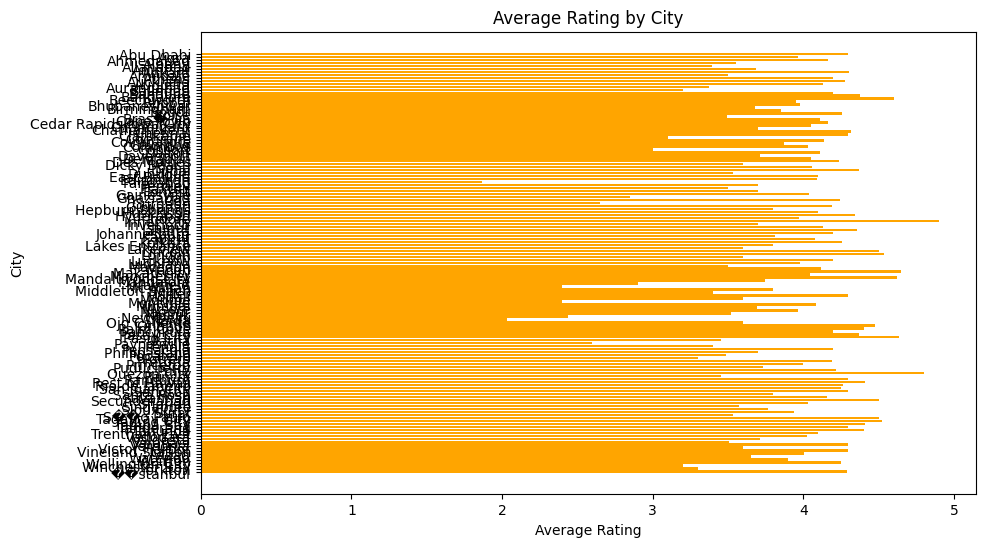

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(city_stats['City'], city_stats['Aggregate rating'], color='orange')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.title('Average Rating by City')
plt.gca().invert_yaxis()
plt.show()

In [13]:
top_cities = city_group.sort_values(by='Restaurant Count', ascending=False).head(10)
print("Top 10 cities with the highest number of restaurants:")
print(top_cities)

Top 10 cities with the highest number of restaurants:
            City  Restaurant Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
17  Bhubaneshwar                21
69       Lucknow                21
5       Amritsar                21
2      Ahmedabad                21
51      Guwahati                21


In [14]:
avg_cost_by_city = data.groupby('City')['Average Cost for two'].mean().reset_index()
print("Average cost for two by city:")
print(avg_cost_by_city.sort_values(by='Average Cost for two', ascending=False))

Average cost for two by city:
               City  Average Cost for two
59          Jakarta         308437.500000
125       Tangerang         250000.000000
19            Bogor         160000.000000
13          Bandung         150000.000000
94       Pasay City           3333.333333
..              ...                   ...
78        Mc Millan             10.000000
57        Inverloch              7.000000
64   Lakes Entrance              7.000000
37      Dicky Beach              7.000000
80           Miller              0.000000

[141 rows x 2 columns]


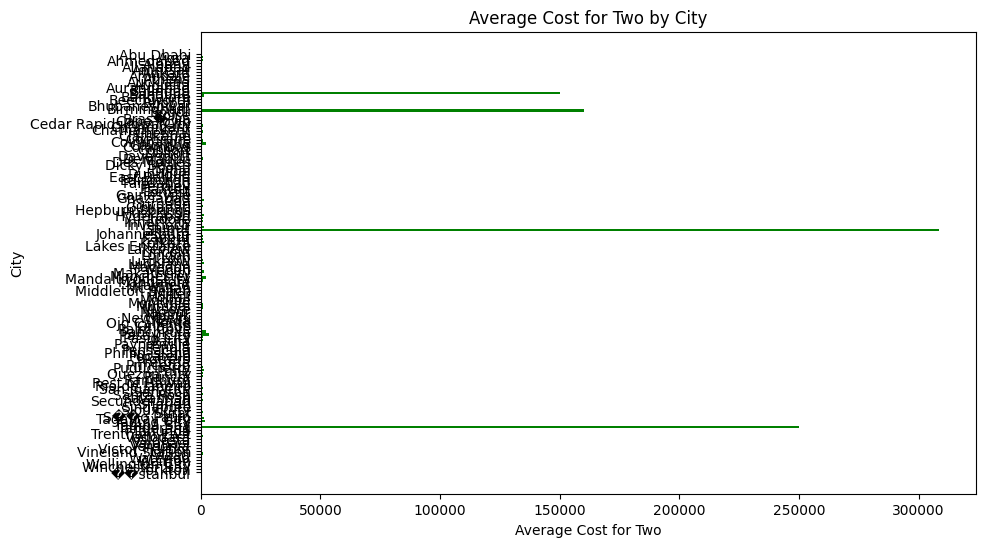

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(avg_cost_by_city['City'], avg_cost_by_city['Average Cost for two'], color='green')
plt.xlabel('Average Cost for Two')
plt.ylabel('City')
plt.title('Average Cost for Two by City')
plt.gca().invert_yaxis()
plt.show()